# Eigenthings and Linear Transformation
---
---

We will start with the linear transformation and then move on to computing eigenvectors and eigenvalues with `Numpy.` We will elaborate on the idea that we can look at a matrix as a linear transformation and that applying a matrix to its eigenvectors produces new vectors with the same direction. As a bonus, we will also see how to visualize linear transformations in `Python!`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# set the default style of figures
plt.style.use('fivethirtyeight')

### Matrices as linear transformations
---

We can think of matrices as linear transformations. `Some matrices will rotate our space, others will rescale it.` When we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we 'apply a matrix to a vector', it means that we are calculating the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.

In [2]:
# Create a trasformation matrix A:
A = np.array([[-1, 3], [2, -2]])


In [25]:
A

array([[5, 1],
       [3, 3]])

In [3]:
# Create a vector v:
v = np.array([[2], [1]])

First, let’s create a function `plotVectors()` to easily plot vectors and visualize transformations:

In [4]:
# create a function plotvectors() to plot vectors
def plotVectors(vecs, colors, alpha=1, figsize=(10,8)):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    colors : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors
    figsize : tuple (x_size,y_size)
        Size of the figure

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure(figsize=figsize)
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    vecs = [vec.flatten() for vec in vecs]

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],
                   alpha=alpha)

Now lets apply the matrix A to this vector and save result in Av

In [9]:
Av = A.dot(v)
Av

array([[1],
       [2]])

We’ll `plot the old vector v (light blue)` and the `new one Av (orange):`

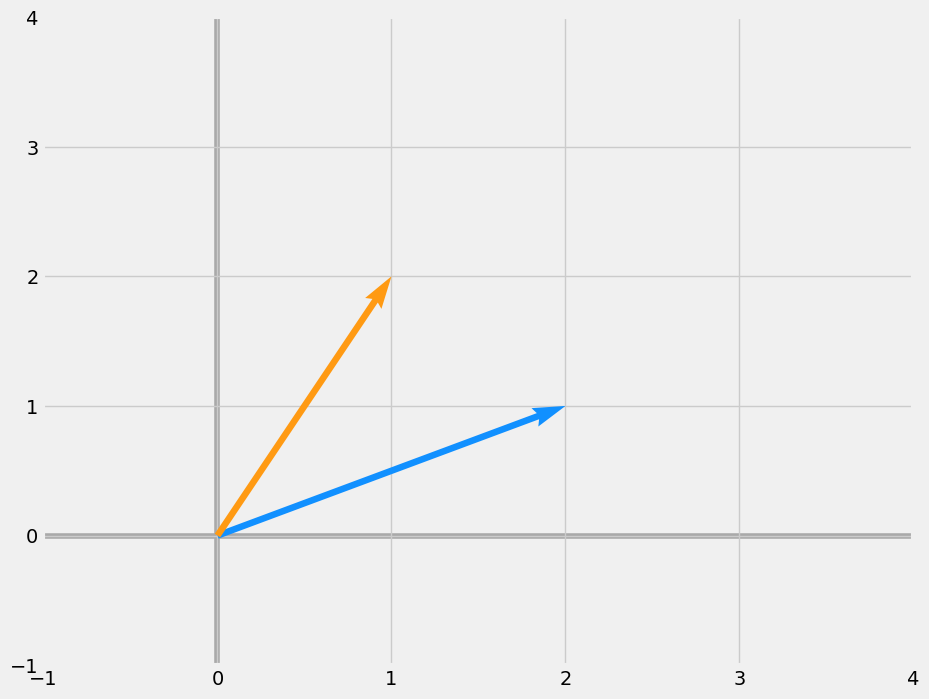

In [10]:
plotVectors([v, Av], colors=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)
plt.show()

We can see that `applying the matrix A has the effect of modifying the vector v.`

### Eigenvectors
---

Now imagine that the transformation of the initial vector gave us a new vector with the same direction. The scale can be different but the direction is the same. When applying a matrix does not change the direction of a vector, this special vector is called an eigenvector of the matrix.


In [11]:
# let A be the following matrix:
A = np.array([[5, 1], [3, 3]])
A
A.shape

(2, 2)

In [12]:
# We know that the eigenvectors of A are:
v1 = np.array([[1], [1]])
v1

array([[1],
       [1]])

In [13]:
#Lets apply matrix A to eigenvector v1:
Av1 = A.dot(v1)
Av1

array([[6],
       [6]])

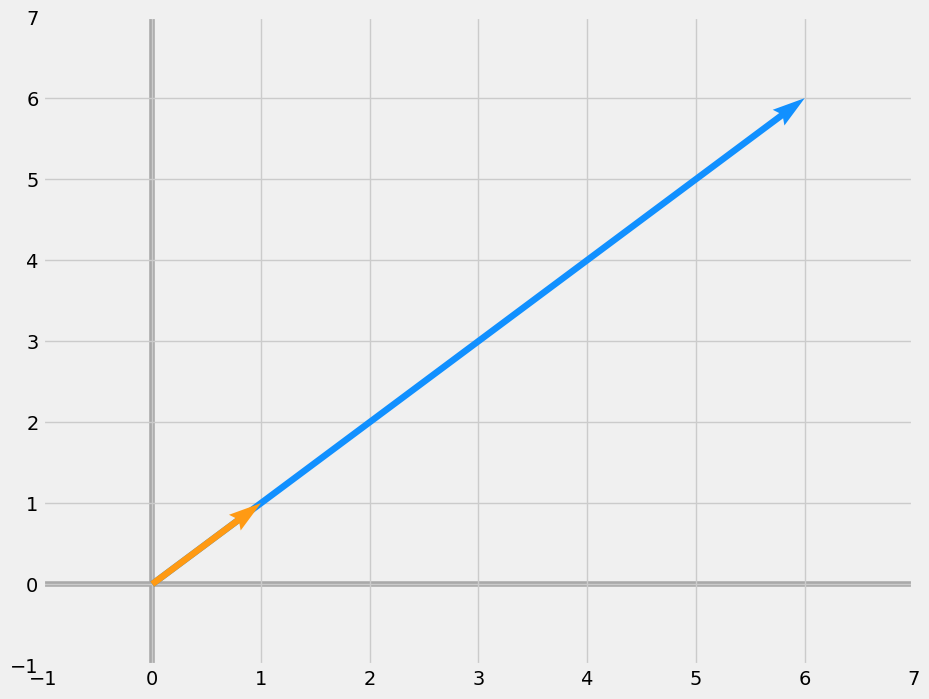

In [14]:
# We can see that their (Av1 and v1) directions are the same!
orange = '#FF9A13'
blue = '#1190FF'
# Lets plot them:
plotVectors([Av1, v1], colors=[blue, orange])
plt.ylim(-1, 7)
plt.xlim(-1, 7)
plt.show()



Another eigenvector of A is:

In [15]:
v2 = np.array([[1], [-3]])
v2

array([[ 1],
       [-3]])

In [16]:
# Lets apply matrix A to eigenvector v2:
Av2 = A.dot(v2)

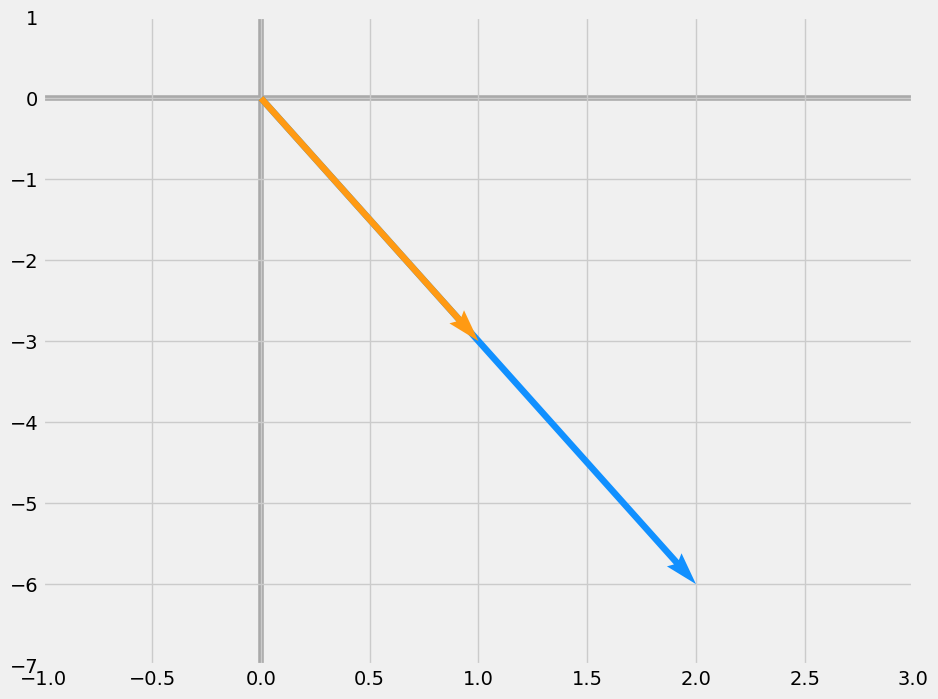

In [17]:
# We can see that their (Av2 and v2) directions are the same!
plotVectors([Av2, v2], colors=[blue, orange])
plt.ylim(-7, 1)
plt.xlim(-1, 3)
plt.show()

`eigenvectors v1 and v2` are vectors that change only in scale when we apply the matrix A to them.

### Finding Eigenvalues and Eigenvectors with Numpy
---

`Numpy linalg` module provides a function `eig()` returning eigenvectors and eigenvalues.

In [18]:
eigenvals, V = np.linalg.eig(A)

In [19]:
eigenvals

array([6., 2.])

> The first array corresponds to the eigenvalues and the second to the eigenvectors concatenated into columns. _The first eigenvalue corresponds to the first eigenvector._ It is also important to know that `np.linalg.eig()` does not return eigenvalues ordered by magnitude.

### Reconstructing Matrix A with its Eigenvectors and Eigenvalues
---

In [20]:
# first create a diagonal matrix with eigenvalues:
Lambdas = np.diag(eigenvals)
Lambdas

array([[6., 0.],
       [0., 2.]])

In [21]:
# second compute the inverse of the eigenvector matrix:
V_inv = np.linalg.inv(V)
V_inv

array([[ 1.06066017,  0.35355339],
       [-0.79056942,  0.79056942]])

In [22]:
# Third we can now reconstruct the original matrix A:
A_orig = V.dot(Lambdas).dot(V_inv)
A_orig

array([[5., 1.],
       [3., 3.]])

In [24]:
A

array([[5, 1],
       [3, 3]])